In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
try:
    # Attempt to read using the default path
    df = pd.read_csv('fraudTest.csv')
except FileNotFoundError:
    # Fallback to the full path in Google Drive
    df = pd.read_csv('/content/drive/MyDrive/fraudTest.csv')


# EDA

In [ ]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df = df.sort_values(by=['trans_date_trans_time'])

In [ ]:
df_eda = df.copy()
df_eda['trans_date'] = df_eda['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_eda['trans_date'] = pd.to_datetime(df_eda['trans_date'])
df_eda["dob"]        = pd.to_datetime(df_eda["dob"])
df_eda['age']        = df_eda['trans_date'] - df_eda['dob']
df_eda['age']        = df_eda['age'].dt.days / 365.25

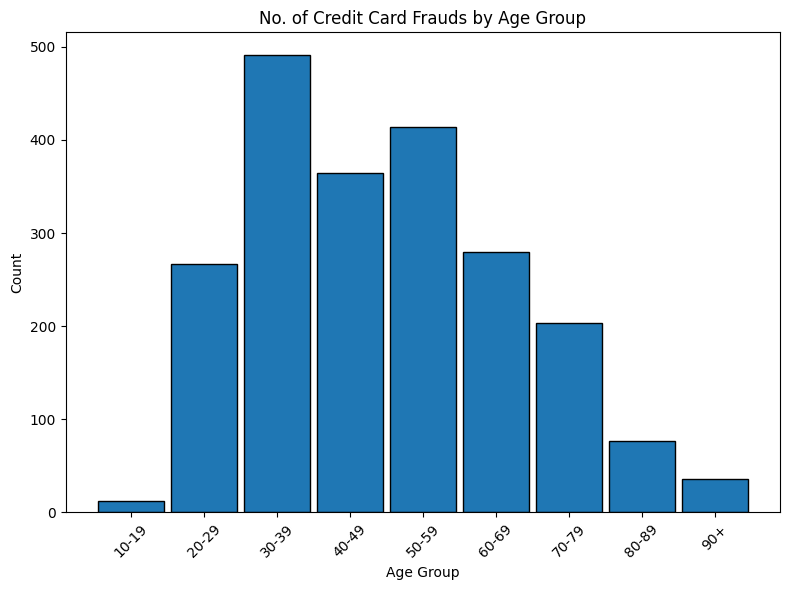

In [ ]:
warnings.filterwarnings("ignore")

df_tmp = df_eda[df_eda["is_fraud"] == 1]

# Define age group bins and labels based on minimum and maximum ages
bins = [10, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create a new column for the age group
df_tmp['age_group'] = pd.cut(df_tmp['age'], bins=bins, labels=labels, right=False)

# Get counts for each age group
age_group_counts = df_tmp['age_group'].value_counts().sort_index()

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(age_group_counts.index, age_group_counts.values, edgecolor="black", width=0.9)

# Add labels and title
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("No. of Credit Card Frauds by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
df = df.groupby('cc_num').agg({
    'merchant': list,
    'category': list
})

In [ ]:
df

,merchant,category
cc_num,,
60416207185,"[fraud_Kutch-Ferry, fraud_Halvorson Group, fra...","[home, misc_pos, gas_transport, kids_pets, per..."
60422928733,"[fraud_Baumbach Ltd, fraud_Skiles LLC, fraud_G...","[personal_care, home, entertainment, shopping_..."
60423098130,"[fraud_Lowe, Dietrich and Erdman, fraud_Johnst...","[kids_pets, travel, home, kids_pets, shopping_..."
60427851591,"[fraud_Fisher Inc, fraud_Lang, Towne and Schup...","[shopping_net, kids_pets, gas_transport, groce..."
60487002085,"[fraud_Crona and Sons, fraud_Schmidt-Larkin, f...","[kids_pets, home, food_dining, kids_pets, shop..."
...,...,...
4958589671582726883,"[fraud_Dietrich-Fadel, fraud_Ankunding LLC, fr...","[health_fitness, shopping_net, entertainment, ..."
4973530368125489546,"[fraud_Reilly LLC, fraud_Greenholt, O'Hara and...","[home, shopping_net, entertainment, grocery_po..."
4980323467523543940,"[fraud_Padberg-Sauer, fraud_Schuppe LLC, fraud...","[home, entertainment, personal_care, travel, m..."


# CNN

## Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
df_CNN = pd.DataFrame(df)

# Convert transaction time and date of birth to datetime format
df_CNN["trans_date_trans_time"] = pd.to_datetime(df_CNN["trans_date_trans_time"])
df_CNN["dob"] = pd.to_datetime(df_CNN["dob"])
df_CNN = df_CNN.dropna(subset=['is_fraud'])

# Label encode categorical columns
le_category = LabelEncoder()
le_merchant = LabelEncoder()
le_state = LabelEncoder()

df_CNN['category'] = le_category.fit_transform(df_CNN['category'])
df_CNN['merchant'] = le_merchant.fit_transform(df_CNN['merchant'])
df_CNN['state']    = le_state.fit_transform(df_CNN['state'])

# Sort the data by credit card number and transaction date
df_CNN = df_CNN.sort_values(by=['cc_num', 'trans_date_trans_time'])

In [ ]:
# Creating new features : Time difference between consecutive transactions for each credit card
df_CNN['time_gap'] = df_CNN.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

# Creating new features: Rolling average of transaction amounts for each credit card (using the last 3 transactions)
df_CNN['rolling_avg_amt'] = df_CNN.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Creating new features: Extracting age from trans_date_trans_time, then subtracting date of birth from it
df_CNN['trans_date'] = df_CNN['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df_CNN['trans_date'] = pd.to_datetime(df_CNN['trans_date'])
df_CNN['age']        = df_CNN['trans_date'] - df_CNN['dob']
df_CNN['age']        = df_CNN['age'].dt.days / 365.25

# Creating new features: Extracting hour from trans_date_trans_time
df_CNN['hour'] = df_CNN['trans_date_trans_time'].dt.hour

In [ ]:
# Normalising the features
scaler = MinMaxScaler()
features_to_scale = ['amt', 'time_gap', 'rolling_avg_amt', 'age', 'hour']
df_CNN[features_to_scale] = scaler.fit_transform(df_CNN[features_to_scale])

In [ ]:
def preprocess_CNN(df, sequence_length):

    sequences = []
    labels = []
    features_to_train = ['amt', 'category', 'state', 'age', 'merchant', 'hour', 'time_gap', 'rolling_avg_amt']

    # Group by credit card number and create sequences
    for _, group in df.groupby('cc_num'):

        # Select the features to be used for model training
        transactions = group[features_to_train].values
        is_fraud_labels = group['is_fraud'].values

        # Generate sequences using a sliding window approach
        for i in range(len(transactions) - sequence_length):
            if not np.isnan(is_fraud_labels[i + sequence_length]):  # Check for NaN
                sequences.append(transactions[i:i + sequence_length])
                labels.append(is_fraud_labels[i + sequence_length])

    # Convert to NumPy arrays
    X = np.array(sequences)
    y = np.array(labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Flatten sequence dimension for SMOTE (reshape to 2D)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)

    # Apply SMOTE
    smote = SMOTE(sampling_strategy='minority', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

    # Reshape X_train back to 3D for RNN input
    X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])

    return X_train_resampled, y_train_resampled, X_test, y_test

## Model Training

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.1 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import optuna
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, GlobalAveragePooling1D, BatchNormalization, ReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define the objective function for Optuna
def objective(trial, X_train_resampled, y_train_resampled):

    # Define the hyperparameters to tune
    num_filters = trial.suggest_categorical('num_filters', [32, 64, 128])
    kernel_size = trial.suggest_int('kernel_size', 3, 5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = 25
    input_shape = (X_train_resampled.shape[1], X_train_resampled.shape[2])  # (sequence_length, num_features)
    output_shape = 1

    # Create the model with the trial's hyperparameters
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)

    conv2 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)

    conv3 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)

    gap = GlobalAveragePooling1D()(conv3)
    output_layer = Dense(output_shape, activation="sigmoid")(gap)

    model = Model(inputs=input_layer, outputs=output_layer)

    callbacks = [
                EarlyStopping(monitor="loss", patience=10, verbose=0, restore_best_weights=True)
                ]

    # Compile and fit the model
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
                        X_train_resampled,
                        y_train_resampled,
                        batch_size=batch_size,
                        epochs=epochs,
                        callbacks=callbacks,
                        validation_split=0.2,
                        verbose=0,
                            )

    # Get the training loss of the last epoch
    training_loss = history.history['loss'][-1]
    return training_loss

In [ ]:
# Create a study and optimize for sequence length of 5
X_train_resampled_seq_len_5, y_train_resampled_seq_len_5, X_test_seq_len_5, y_test_seq_len_5 = preprocess_CNN(df_CNN, sequence_length=5)

# study = optuna.create_study(direction='minimize')  # Minimize training loss
# study.optimize(lambda trial: objective(trial, X_train_resampled_seq_len_5, y_train_resampled_seq_len_5), n_trials=20)

# print("Best hyperparameters for sequence length 5:", study.best_params)

# Create a study and optimize for sequence length of 10
X_train_resampled_seq_len_10, y_train_resampled_seq_len_10, X_test_seq_len_10, y_test_seq_len_10 = preprocess_CNN(df_CNN, sequence_length=10)

# study2 = optuna.create_study(direction='minimize')  # Minimize training loss
# study2.optimize(lambda trial: objective(trial, X_train_resampled_seq_len_10, X_train_resampled_seq_len_10), n_trials=20)

# print("Best hyperparameters for sequence length 10:", study2.best_params)

In [ ]:
def make_cnn_model(input_shape, output_shape, num_filters, kernel_size, name):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(input_layer)
    conv1 = BatchNormalization()(conv1)
    conv1 = ReLU()(conv1)

    conv2 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(conv1)
    conv2 = BatchNormalization()(conv2)
    conv2 = ReLU()(conv2)

    conv3 = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="same")(conv2)
    conv3 = BatchNormalization()(conv3)
    conv3 = ReLU()(conv3)

    gap = GlobalAveragePooling1D()(conv3)

    output_layer = Dense(output_shape, activation="sigmoid")(gap)

    return Model(inputs=input_layer, outputs=output_layer, name=name)

# For sequence length of 5
input_shape = (X_train_resampled_seq_len_5.shape[1], X_train_resampled_seq_len_5.shape[2])  # (sequence_length, num_features)
output_shape = 1

CNN_model_seq_len_5 = make_cnn_model(input_shape, output_shape, num_filters=128, kernel_size=5, name="CNN_seq_len_5")
CNN_model_seq_len_5.summary()

# For sequence length of 10
input_shape = (X_train_resampled_seq_len_10.shape[1], X_train_resampled_seq_len_10.shape[2])  # (sequence_length, num_features)
output_shape = 1

CNN_model_seq_len_10 = make_cnn_model(input_shape, output_shape, num_filters=128, kernel_size=4, name="CNN_seq_len_10")
CNN_model_seq_len_10.summary()

Model: "CNN_seq_len_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 5, 8)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 5, 128)              │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 5, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 5, 128)              │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 5, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,009 (668.00 KB)

 Trainable params: 170,241 (665.00 KB)

 Non-trainable params: 768 (3.00 KB)

Model: "CNN_seq_len_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 10, 8)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 10, 128)             │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_4 (Conv1D)                    │ (None, 10, 128)             │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 10, 128)             │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 10, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 137,217 (536.00 KB)

 Trainable params: 136,449 (533.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
epochs = 25
batch_size = 128

callbacks = [
EarlyStopping(monitor="loss", patience=10, verbose=1, restore_best_weights=True),
]

In [ ]:
# Train CNN model with sequence length 5
CNN_model_seq_len_5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
    )
history_seq_len_5 = CNN_model_seq_len_5.fit(
    X_train_resampled_seq_len_5,
    y_train_resampled_seq_len_5,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
    )

Epoch 1/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 31s 4ms/step - accuracy: 0.8215 - loss: 0.3640 - val_accuracy: 0.7469 - val_loss: 0.7967
Epoch 2/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9620 - loss: 0.1039 - val_accuracy: 0.2670 - val_loss: 6.5061
Epoch 3/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9783 - loss: 0.0628 - val_accuracy: 0.6952 - val_loss: 1.1879
Epoch 4/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9847 - loss: 0.0450 - val_accuracy: 0.9900 - val_loss: 0.0379
Epoch 5/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9888 - loss: 0.0342 - val_accuracy: 0.9793 - val_loss: 0.0580
Epoch 6/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9907 - loss: 0.0278 - val_accuracy: 0.8921 - val_loss: 0.2750
Epoch 7/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9923 - loss: 0.0236 - val_accuracy: 0.9986 - val_loss: 0.0099
Epoch 8/25
5491/5491 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9935 - loss: 0

In [ ]:
# Train CNN model with sequence length 10
CNN_model_seq_len_10.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"],
    )
history_seq_len_10 = CNN_model_seq_len_10.fit(
    X_train_resampled_seq_len_10,
    y_train_resampled_seq_len_10,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
    )

Epoch 1/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 3.4529e-04
Epoch 2/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9998 - loss: 7.5204e-04 - val_accuracy: 0.9859 - val_loss: 0.0381
Epoch 3/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 2.7905e-04
Epoch 4/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9995 - loss: 0.0014 - val_accuracy: 0.8558 - val_loss: 0.4800
Epoch 5/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9996 - loss: 0.0012 - val_accuracy: 0.9998 - val_loss: 0.0014
Epoch 6/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9997 - loss: 7.8233e-04 - val_accuracy: 0.9954 - val_loss: 0.0117
Epoch 7/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9998 - loss: 5.7794e-04 - val_accuracy: 0.8433 - val_loss: 0.5942
Epoch 8/25
5446/5446 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accura

## Model Evaluation

In [ ]:
def print_evaluation_metrics(model, X_test, y_test, threshold):
  y_pred_proba = model.predict(X_test)
  y_pred = (y_pred_proba > threshold).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred_proba)
  binary_cross_entropy_loss = log_loss(y_test, y_pred_proba)

  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1 Score: {f1:.4f}")
  print(f"ROC-AUC Score: {roc_auc:.4f}")
  print(f"Binary Cross-Entropy Loss: {binary_cross_entropy_loss:.4f}")

  test_dic = {
  "is_fraud": y_test,           # True labels
  "predicted_output": y_pred    # Predicted labels
  }

  return test_dic

In [ ]:
test_dic_seq_len_5 = print_evaluation_metrics(CNN_model_seq_len_5, X_test_seq_len_5, y_test_seq_len_5, 0.5)

3445/3445 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 0.9935
Precision: 0.2698
Recall: 0.3963
F1 Score: 0.3211
ROC-AUC Score: 0.9074
Binary Cross-Entropy Loss: 0.0352


In [ ]:
test_dic_seq_len_10 = print_evaluation_metrics(CNN_model_seq_len_10, X_test_seq_len_10, y_test_seq_len_10, 0.5)

3416/3416 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
Accuracy: 0.9980
Precision: 0.7280
Recall: 0.6795
F1 Score: 0.7029
ROC-AUC Score: 0.9773
Binary Cross-Entropy Loss: 0.0125


In [ ]:
def plot_cm(test_dic, sequence_length):
    cm = confusion_matrix(test_dic["is_fraud"], test_dic["predicted_output"])
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Fraud", "Fraud"])
    disp.plot(values_format='d', cmap="Reds")

    plt.title(f"CNN (Sequence Length {sequence_length}) \nPrecision={precision:.2f}, Recall={recall:.2f}, F1 Score={f1_score:.2f}")
    # plt.savefig(f"cnn_cm_seq_len_{sequence_length}.png", dpi=300)
    plt.show()

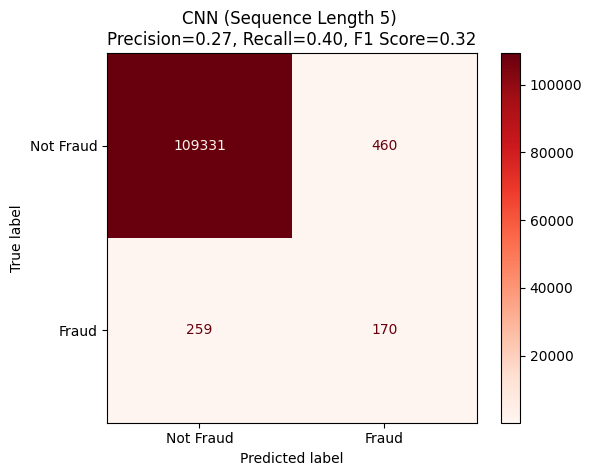

In [ ]:
plot_cm(test_dic_seq_len_5, sequence_length=5)

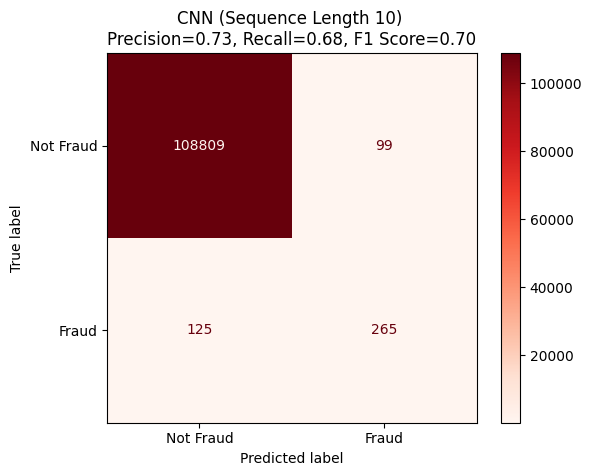

In [ ]:
plot_cm(test_dic_seq_len_10, sequence_length=10)

# RNN

EDA

is_fraud
0    553574
1      2145
Name: count, dtype: int64
Fraud Transaction Amount Statistics:
count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

Non-Fraud Transaction Amount Statistics:
count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64


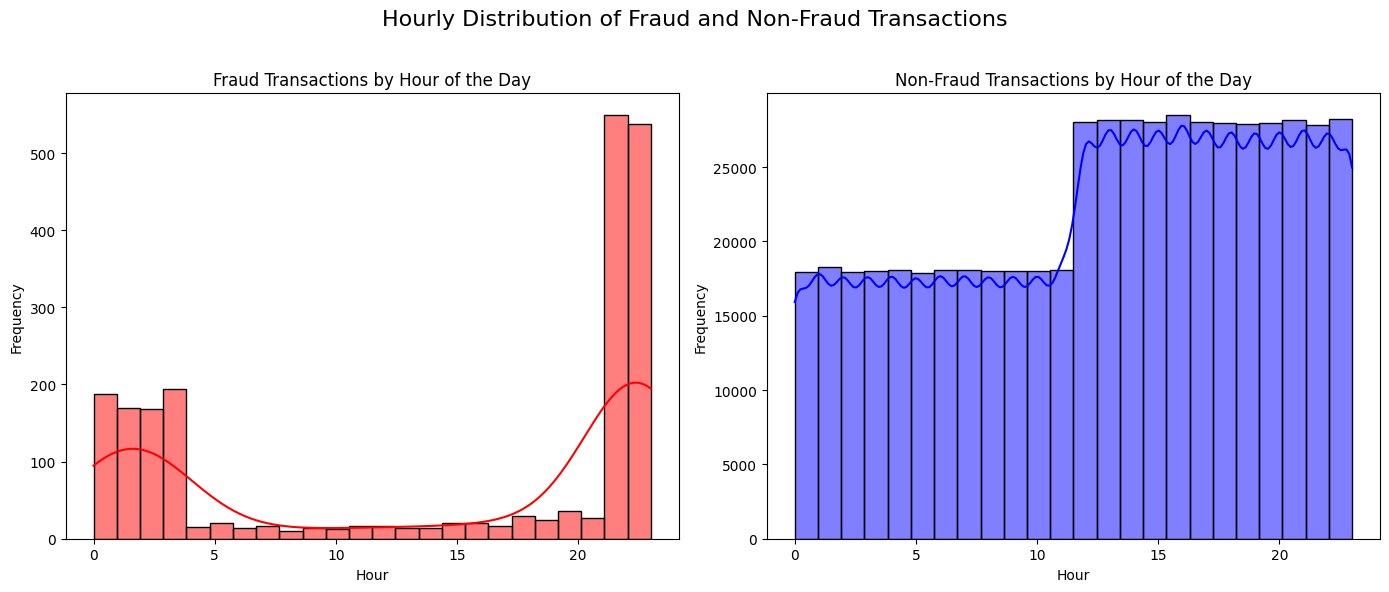

Top 10 States by Transaction Counts
is_fraud      0    1
state               
NY        35743  175
PA        34212  114
TX        40280  113
CA        24059   76
IL        18884   76
VA        12431   75
IN        11884   75
MN        13646   73
MO        16430   71
IA        11750   69

Top 10 Categories by Transaction Counts
is_fraud           0    1
category                 
shopping_net   41273  506
grocery_pos    52068  485
misc_net       27100  267
shopping_pos   49578  213
gas_transport  56216  154
misc_pos       34502   72
personal_care  39257   70
home           52278   67
kids_pets      48627   65
entertainment  40045   59

Top 10 Merchants by Transaction Counts
is_fraud                                       0   1
merchant                                            
fraud_Mosciski, Ziemann and Farrell          852  18
fraud_Lemke-Gutmann                          819  18
fraud_Romaguera, Cruickshank and Greenholt   810  18
fraud_Schultz, Simonis and Little            972  17
f

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


df_RNN = pd.DataFrame(df)
df_RNN["trans_date_trans_time"] = pd.to_datetime(df_RNN["trans_date_trans_time"])
df_RNN = df_RNN.dropna(subset=['is_fraud'])

#Checking class counts
class_counts = df_RNN['is_fraud'].value_counts()
print(class_counts)

# Checking Distribution analysis for fraud amount
fraud_data = df_RNN[df_RNN['is_fraud'] == 1]
non_fraud_data = df_RNN[df_RNN['is_fraud'] == 0]
print("Fraud Transaction Amount Statistics:")
print(fraud_data['amt'].describe())

print("\nNon-Fraud Transaction Amount Statistics:")
print(non_fraud_data['amt'].describe())

#Time based analysis by hour

def plot_hourly_distribution(data, transaction_time_col='trans_date_trans_time', fraud_col='is_fraud'):
    data[transaction_time_col] = pd.to_datetime(data[transaction_time_col])
    data['hour'] = data[transaction_time_col].dt.hour

    fraud_data = data[data[fraud_col] == 1]
    non_fraud_data = data[data[fraud_col] == 0]

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(fraud_data['hour'], bins=24, color='red', kde=True)
    plt.title("Fraud Transactions by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    sns.histplot(non_fraud_data['hour'], bins=24, color='blue', kde=True)
    plt.title("Non-Fraud Transactions by Hour of the Day")
    plt.xlabel("Hour")
    plt.ylabel("Frequency")

    plt.suptitle("Hourly Distribution of Fraud and Non-Fraud Transactions", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_hourly_distribution(df_RNN)


#Category based analysis

state_counts = df_RNN.groupby(['state', 'is_fraud']).size().unstack(fill_value=0)
category_counts = df_RNN.groupby(['category', 'is_fraud']).size().unstack(fill_value=0)
merchant_counts = df_RNN.groupby(['merchant', 'is_fraud']).size().unstack(fill_value=0)

# Display top 10 states with the highest counts
print("Top 10 States by Transaction Counts")
print(state_counts.sort_values(by=[1, 0], ascending=False).head(10))

# Display top 10 categories with the highest counts
print("\nTop 10 Categories by Transaction Counts")
print(category_counts.sort_values(by=[1, 0], ascending=False).head(10))

# Display top 10 merchants with the highest counts
print("\nTop 10 Merchants by Transaction Counts")
print(merchant_counts.sort_values(by=[1, 0], ascending=False).head(10))


Data preparation


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE


df_RNN = pd.DataFrame(df)

# Convert transaction time to datetime format
df_RNN["trans_date_trans_time"] = pd.to_datetime(df_RNN["trans_date_trans_time"])
df_RNN = df_RNN.dropna(subset=['is_fraud'])


# Label encode categorical columns
le_category = LabelEncoder()
le_merchant = LabelEncoder()
le_state = LabelEncoder()

df_RNN['category'] = le_category.fit_transform(df_RNN['category'])
df_RNN['merchant'] = le_merchant.fit_transform(df_RNN['merchant'])
df_RNN['state'] = le_state.fit_transform(df_RNN['state'])

# Sort the data by credit card number and transaction date
df_RNN = df_RNN.sort_values(by=['cc_num', 'trans_date_trans_time'])

# Creating new features : Time difference between consecutive transactions for each credit card
df_RNN['time_gap'] = df_RNN.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)

# Creating new features: Rolling average of transaction amounts for each credit card (using the last 3 transactions)
df_RNN['rolling_avg_amt'] = df_RNN.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

#Normalising the features
scaler = MinMaxScaler()
features_to_scale = ['amt', 'time_gap', 'rolling_avg_amt']
df_RNN[features_to_scale] = scaler.fit_transform(df_RNN[features_to_scale])

# Define sequence length
sequence_length = 5

# Preparing sequences and labels
sequences = []
labels = []


# Group by credit card number and create sequences
for _, group in df_RNN.groupby('cc_num'):
    # Select the features for each transaction
    transactions = group[['amt', 'category', 'time_gap', 'rolling_avg_amt', 'merchant', 'state']].values
    is_fraud_labels = group['is_fraud'].values

    # Generate sequences using a sliding window approach
    for i in range(len(transactions) - sequence_length):
        if not np.isnan(is_fraud_labels[i + sequence_length]):  # Check for NaN
            sequences.append(transactions[i:i + sequence_length])
            labels.append(is_fraud_labels[i + sequence_length])

# Convert to NumPy arrays
X = np.array(sequences)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten sequence dimension for SMOTE (reshape to 2D)
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# Reshape X_train back to 3D for RNN input
X_train_resampled = X_train_resampled.reshape(-1, X_train.shape[1], X_train.shape[2])



Building RNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

# Define the RNN model
RNN_model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(64, return_sequences=True),  # LSTM layer with 64 units
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
RNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
RNN_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,137 (121.63 KB)

 Trainable params: 31,137 (121.63 KB)

 Non-trainable params: 0 (0.00 B)

Training RNN Model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
#Training the model
history = RNN_model.fit(
    X_train_resampled, y_train_resampled,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/10
21963/21963 ━━━━━━━━━━━━━━━━━━━━ 207s 9ms/step - accuracy: 0.8322 - loss: 0.3673 - val_accuracy: 0.9242 - val_loss: 0.1659
Epoch 2/10
21963/21963 ━━━━━━━━━━━━━━━━━━━━ 250s 9ms/step - accuracy: 0.9270 - loss: 0.1943 - val_accuracy: 0.8891 - val_loss: 0.2538
Epoch 3/10
21963/21963 ━━━━━━━━━━━━━━━━━━━━ 193s 9ms/step - accuracy: 0.9379 - loss: 0.1653 - val_accuracy: 0.9345 - val_loss: 0.1527
Epoch 4/10
21963/21963 ━━━━━━━━━━━━━━━━━━━━ 230s 10ms/step - accuracy: 0.9445 - loss: 0.1455 - val_accuracy: 0.9000 - val_loss: 0.2376
Epoch 5/10
21963/21963 ━━━━━━━━━━━━━━━━━━━━ 200s 9ms/step - accuracy: 0.9509 - loss: 0.1294 - val_accuracy: 0.9106 - val_loss: 0.2100


Evaluation of RNN Model on test data

3445/3445 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
Accuracy: 0.9742
Precision: 0.1054
Recall: 0.7506
F1 Score: 0.1848
ROC-AUC Score: 0.9092
Binary Cross-Entropy Loss: 0.0873
3445/3445 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step


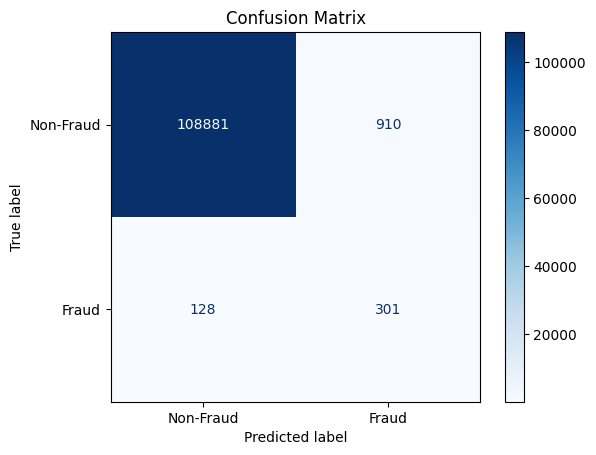

New Accuracy: 0.9906
New Precision: 0.2486
New Recall: 0.7016
New F1 Score: 0.3671
New ROC-AUC Score: 0.9092
New Binary Cross-Entropy Loss: 0.0873


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, roc_auc_score, log_loss, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# 0.5 threshold
y_pred_proba = RNN_model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
binary_cross_entropy_loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Binary Cross-Entropy Loss: {binary_cross_entropy_loss:.4f}")


#Adjusting the threshold to 0.8

y_pred_proba = RNN_model.predict(X_test)
y_pred = (y_pred_proba > 0.8).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
binary_cross_entropy_loss = log_loss(y_test, y_pred_proba)

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


print(f"New Accuracy: {accuracy:.4f}")
print(f"New Precision: {precision:.4f}")
print(f"New Recall: {recall:.4f}")
print(f"New F1 Score: {f1:.4f}")
print(f"New ROC-AUC Score: {roc_auc:.4f}")
print(f"New Binary Cross-Entropy Loss: {binary_cross_entropy_loss:.4f}")


# Transformer

In [ ]:
df = pd.read_csv('drive/My Drive/fraudTest.csv')

In [ ]:
import tensorflow as tf
from imblearn.combine import SMOTETomek
import pandas as pd
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, Concatenate, MultiHeadAttention, LayerNormalization, Add, GlobalAveragePooling1D, Dropout, Layer, Lambda, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import F1Score
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split

In [ ]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df['hour'] = df['trans_date_trans_time'].dt.hour
df['time_diff'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds().fillna(0)
df['rolling_avg_amt'] = df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
df = df.sort_values(by=['trans_date_trans_time'])

df_grouped = df.groupby('cc_num').agg({
    'merchant': list,
    'category': list,
    'hour': list,
    'time_diff': list,
    'amt': list,
    'rolling_avg_amt': list,
    'is_fraud': lambda x: 1 if any(x == 1) else 0
}).reset_index()

In [ ]:
all_merchants = [merchant for sublist in df_grouped['merchant'] for merchant in sublist]
all_categories = [category for sublist in df_grouped['category'] for category in sublist]

merchant_encoder = LabelEncoder()
category_encoder = LabelEncoder()

merchant_encoder.fit(all_merchants)
category_encoder.fit(all_categories)

df_grouped['merchant_indices'] = df_grouped['merchant'].apply(lambda x: merchant_encoder.transform(x))
df_grouped['category_indices'] = df_grouped['category'].apply(lambda x: category_encoder.transform(x))
scaler = MinMaxScaler(feature_range=(0, 1))
df_grouped['amt_normalized'] = df_grouped['amt'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())
df_grouped['hour_normalized'] = df_grouped['hour'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())
df_grouped['time_diff_normalized'] = df_grouped['time_diff'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())
df_grouped['rolling_normalized'] = df_grouped['rolling_avg_amt'].apply(lambda x: scaler.fit_transform(np.array(x).reshape(-1, 1)).flatten())

max_len = max(df_grouped['merchant_indices'].apply(len))  # Get maximum length for padding
X_merchants = pad_sequences(df_grouped['merchant_indices'], maxlen=max_len, padding='post')
X_categories = pad_sequences(df_grouped['category_indices'], maxlen=max_len, padding='post')
X_hour = pad_sequences(df_grouped['hour_normalized'], maxlen=max_len, padding='post')
X_time_diff = pad_sequences(df_grouped['time_diff_normalized'], maxlen=max_len, padding='post')
X_amt = pad_sequences(df_grouped['amt_normalized'], maxlen=max_len, padding='post')
X_rolling = pad_sequences(df_grouped['rolling_normalized'], maxlen=max_len, padding='post')

y = df_grouped['is_fraud'].values

X_train_merchants, X_test_merchants, \
X_train_categories, X_test_categories, \
X_train_hour, X_test_hour, \
X_train_time_diff, X_test_time_diff, \
X_train_amt, X_test_amt, \
X_train_rolling, X_test_rolling,\
y_train, y_test = train_test_split(
    X_merchants, X_categories, X_hour, X_time_diff, X_amt, X_rolling, y,
    test_size=0.2, random_state=42, stratify=y
)

In [ ]:
class ExpandDimsLayer(Layer):
    def call(self, inputs):
        return tf.expand_dims(inputs, axis=-1)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
vocab_size_merchant = len(merchant_encoder.classes_)
vocab_size_category = len(category_encoder.classes_)
embedding_dim = 32

merchant_input = Input(shape=(max_len,), name='merchant_input')
category_input = Input(shape=(max_len,), name='category_input')
hour_input = Input(shape=(max_len,), name='hour_input')
time_input = Input(shape=(max_len,), name='time_input')
amt_input = Input(shape=(max_len,), name='amt_input')
rolling_input = Input(shape=(max_len,), name='rolling_input')

merchant_embedding = Embedding(input_dim=vocab_size_merchant, output_dim=embedding_dim)(merchant_input)
category_embedding = Embedding(input_dim=vocab_size_category, output_dim=embedding_dim)(category_input)

attention_layer = MultiHeadAttention(num_heads=6, key_dim=embedding_dim)
merchant_att, _ = attention_layer(merchant_embedding, merchant_embedding, return_attention_scores=True)
merchant_att = Add()([merchant_embedding, merchant_att])
merchant_att = LayerNormalization()(merchant_att)

category_att, _ = attention_layer(category_embedding, category_embedding, return_attention_scores=True)
category_att = Add()([category_embedding, category_att])
category_att = LayerNormalization()(category_att)

hour_normalized = LayerNormalization()(hour_input)
time_normalized = LayerNormalization()(time_input)
amt_normalized = LayerNormalization()(amt_input)
rolling_normalized = LayerNormalization()(rolling_input)

merchant_pooled = GlobalAveragePooling1D()(merchant_att)
category_pooled = GlobalAveragePooling1D()(category_att)

combined = Concatenate()([merchant_pooled, category_pooled, hour_normalized, time_normalized, amt_normalized, rolling_normalized])
x = Dense(64, activation='relu')(combined)
outputs = Dense(1, activation='sigmoid')(x)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y),
    y=y
)
class_weights_dict = {class_label: weight for class_label, weight in zip(np.unique(y), class_weights)}

optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0001,
    clipnorm=1.0)

early_stopping = EarlyStopping(
    monitor='loss',
    patience=2,
    min_delta=0.001,
    restore_best_weights=True
)

model = Model(inputs=[merchant_input, category_input, hour_input, time_input, amt_input, rolling_input], outputs=outputs)
f1 = F1Score(name='f1_score', average='macro')
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.fit([X_train_merchants, X_train_categories, X_train_hour, X_train_time_diff, X_train_amt, X_train_rolling], y_train, epochs=10, batch_size=4, class_weight=class_weights_dict, callbacks=[early_stopping])

Epoch 1/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.6294 - loss: 0.8098
Epoch 2/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 28s 39ms/step - accuracy: 0.8371 - loss: 0.5575
Epoch 3/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.9337 - loss: 0.3561
Epoch 4/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9849 - loss: 0.1985
Epoch 5/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.9953 - loss: 0.1350
Epoch 6/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9953 - loss: 0.0834
Epoch 7/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.9994 - loss: 0.0407
Epoch 8/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 1.0000 - loss: 0.0252
Epoch 9/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 1.0000 - loss: 0.0149
Epoch 10/10
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - accuracy: 1.0000 - loss: 0.0101


In [ ]:
y_pred_probs = model.predict([X_test_merchants, X_test_categories, X_test_hour, X_test_time_diff, X_test_amt, X_test_rolling], batch_size=4)
y_pred_classes = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary classes

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Binary Cross-Entropy Loss
cross_entropy_loss = log_loss(y_test, y_pred_probs)
print(f"Binary Cross-Entropy Loss: {cross_entropy_loss:.4f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       141
           1       0.34      0.23      0.27        44

    accuracy                           0.71       185
   macro avg       0.56      0.55      0.55       185
weighted avg       0.68      0.71      0.69       185

ROC AUC Score: 0.5600
Binary Cross-Entropy Loss: 0.8177


In [ ]:
fraud_indices_in_df_grouped = df_grouped[df_grouped['is_fraud'] == 1].index
_, X_test_indices, _, y_test = train_test_split(
    np.arange(len(df_grouped)), y, test_size=0.2, random_state=42, stratify=y
)
fraud_cases_in_y_test = np.intersect1d(fraud_indices_in_df_grouped, X_test_indices)

fraud_cases_in_test_set = df_grouped.iloc[fraud_cases_in_y_test]

print("Fraud Cases in y_test:")
print(fraud_cases_in_test_set.head())

Fraud Cases in y_test:
          cc_num                                           merchant  \
4    60487002085  [fraud_Crona and Sons, fraud_Schmidt-Larkin, f...   
10  501882822387  [fraud_Terry-Huel, fraud_Thiel Ltd, fraud_Laba...   
16  503851367360  [fraud_Doyle Ltd, fraud_Lynch Ltd, fraud_Bashi...   
27  571844099986  [fraud_Rau and Sons, fraud_Stamm-Witting, frau...   
37  586100864972  [fraud_Little Ltd, fraud_Rodriguez, Yost and J...   

                                             category  \
4   [kids_pets, home, food_dining, kids_pets, shop...   
10  [shopping_net, travel, shopping_net, home, sho...   
16  [grocery_pos, shopping_pos, shopping_net, misc...   
27  [grocery_pos, shopping_net, grocery_net, enter...   
37  [kids_pets, misc_net, shopping_pos, shopping_n...   

                                                 hour  \
4   [14, 21, 23, 12, 21, 1, 1, 13, 23, 22, 12, 19,...   
10  [9, 13, 4, 15, 5, 7, 6, 5, 7, 17, 7, 20, 1, 6,...   
16               [2, 22, 22, 23, 0, 

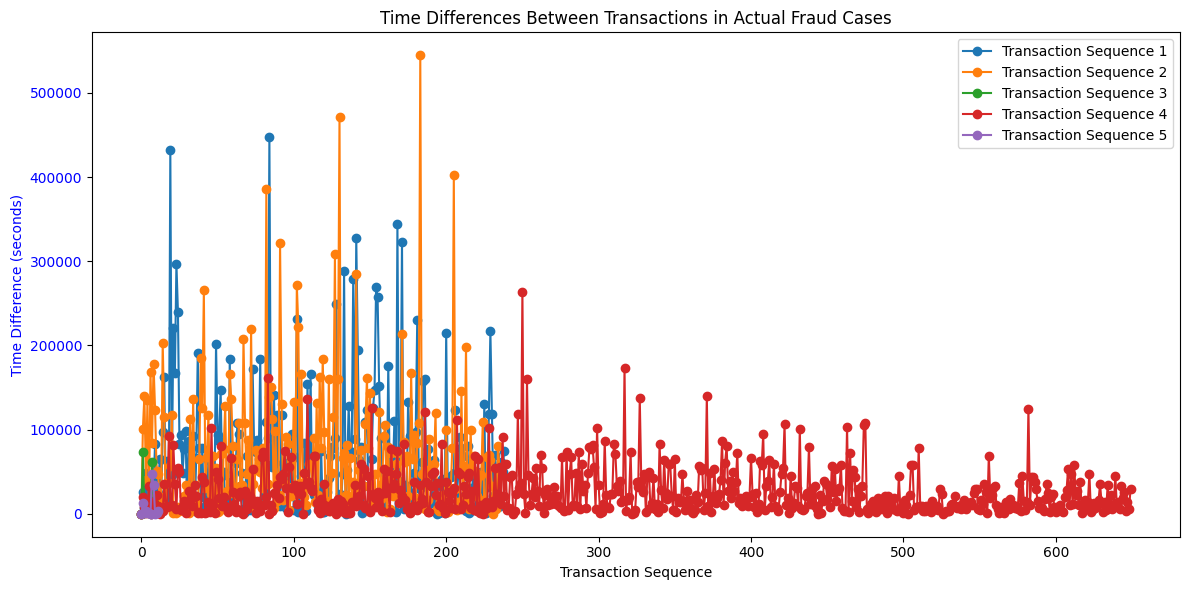

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(5):
    time_diffs = fraud_cases_in_test_set.iloc[i]['time_diff']
    ax.plot(range(len(time_diffs)), time_diffs, marker='o', label=f"Transaction Sequence {i + 1}")

ax.set_xlabel("Transaction Sequence")
ax.set_ylabel("Time Difference (seconds)", color='b')
ax.tick_params(axis='y', labelcolor='b')

plt.title("Time Differences Between Transactions in Actual Fraud Cases")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

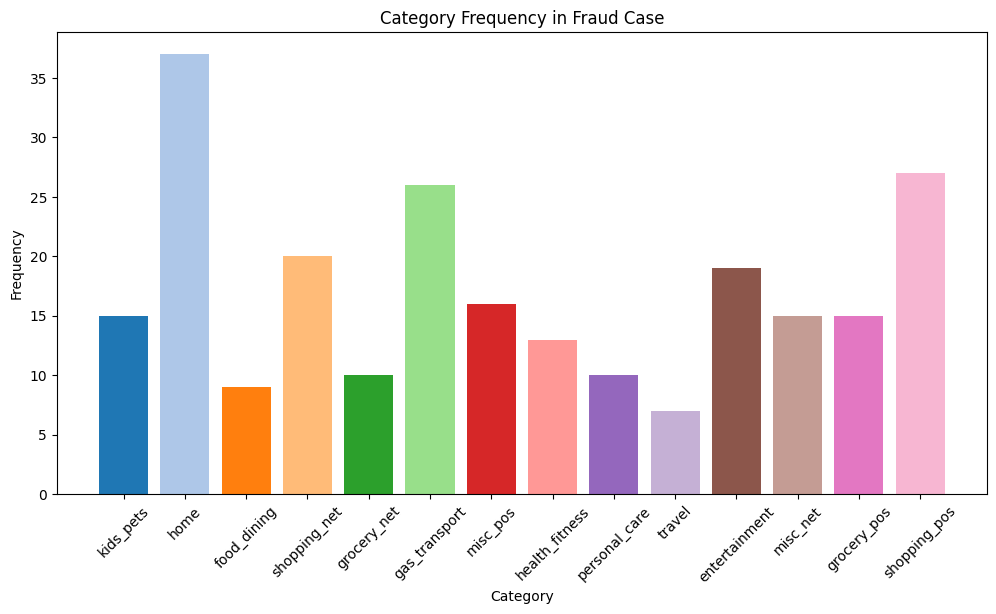

In [ ]:
category_names = fraud_cases_in_test_set.iloc[0]['category']

category_counts = Counter(category_names)

plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=plt.cm.tab20.colors)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Category Frequency in Fraud Case")
plt.xticks(rotation=45)
plt.show()


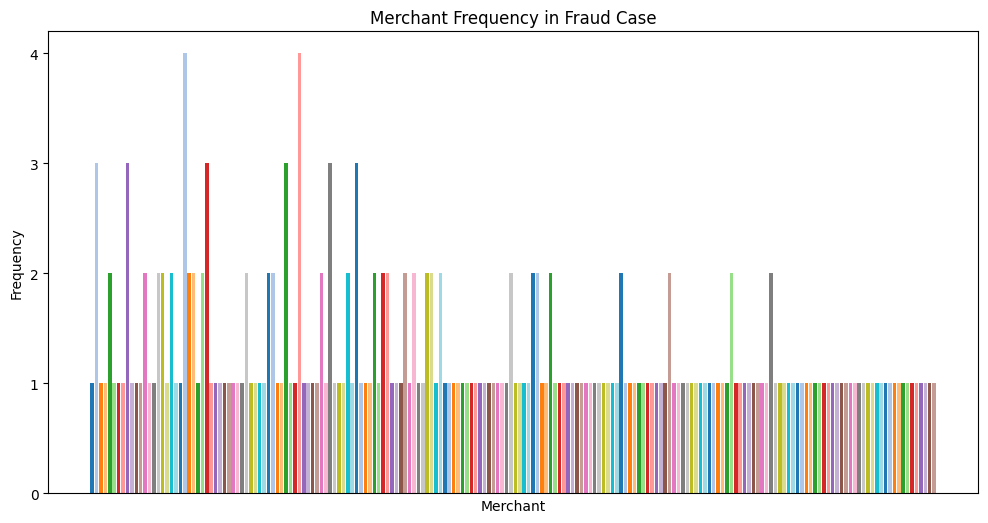

In [ ]:
merchant_names = fraud_cases_in_test_set.iloc[0]['merchant']

merchant_counts = Counter(merchant_names)

plt.figure(figsize=(12, 6))
plt.bar(merchant_counts.keys(), merchant_counts.values(), color=plt.cm.tab20.colors)
plt.xlabel("Merchant")
plt.ylabel("Frequency")
plt.title("Merchant Frequency in Fraud Case")
plt.xticks([])
plt.yticks(range(0, int(max(merchant_counts.values())) + 1))
plt.show()

In [ ]:
actual_fraud_indices = np.where(y_test == 1)[0]

correctly_predicted_fraud_indices = [
    idx for idx in actual_fraud_indices if y_pred_classes[idx] == 1
]
correctly_predicted_fraud_cases = df_grouped.iloc[X_test_indices[correctly_predicted_fraud_indices]]

print("Correctly Predicted Fraud Cases:")
print(correctly_predicted_fraud_cases)

Correctly Predicted Fraud Cases:
               cc_num                                           merchant  \
37       586100864972  [fraud_Little Ltd, fraud_Rodriguez, Yost and J...   
367   377550167323848  [fraud_Waelchi-Wolf, fraud_Yost-Rogahn, fraud_...   
229   180020605265701  [fraud_Reilly, Heaney and Cole, fraud_Price In...   
339   372965408103277  [fraud_Schultz, Simonis and Little, fraud_Boye...   
93      4295296907373  [fraud_Conroy-Cruickshank, fraud_Bednar Group,...   
16       503851367360  [fraud_Doyle Ltd, fraud_Lynch Ltd, fraud_Bashi...   
193    30510856607165  [fraud_Bernier, Volkman and Hoeger, fraud_Cham...   
427  2712209726293386  [fraud_Reilly LLC, fraud_Rau-Robel, fraud_Klin...   
124     4755696071492  [fraud_Fisher Inc, fraud_Rau-Robel, fraud_Wiza...   
275   213161293389774  [fraud_Larkin, Stracke and Greenfelder, fraud_...   
374   378858024506425  [fraud_Homenick LLC, fraud_Kiehn Inc, fraud_Bo...   

                                              category

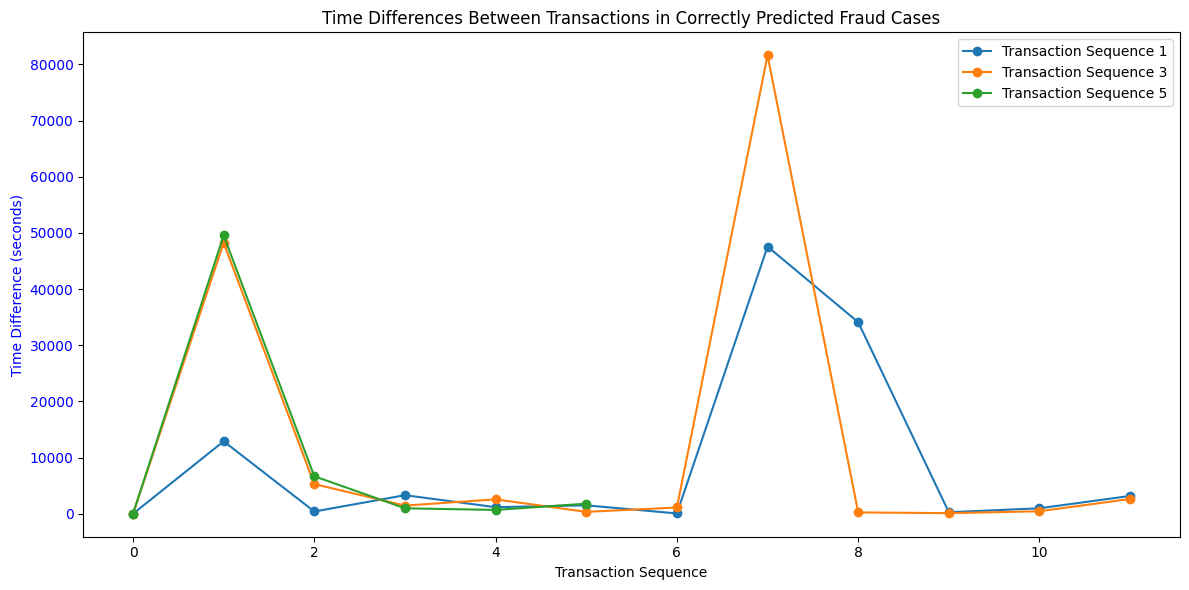

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(0,5,2):
    time_diffs = correctly_predicted_fraud_cases.iloc[i]['time_diff']
    ax.plot(range(len(time_diffs)), time_diffs, marker='o', label=f"Transaction Sequence {i + 1}")

ax.set_xlabel("Transaction Sequence")
ax.set_ylabel("Time Difference (seconds)", color='b')
ax.tick_params(axis='y', labelcolor='b')

plt.title("Time Differences Between Transactions in Correctly Predicted Fraud Cases")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

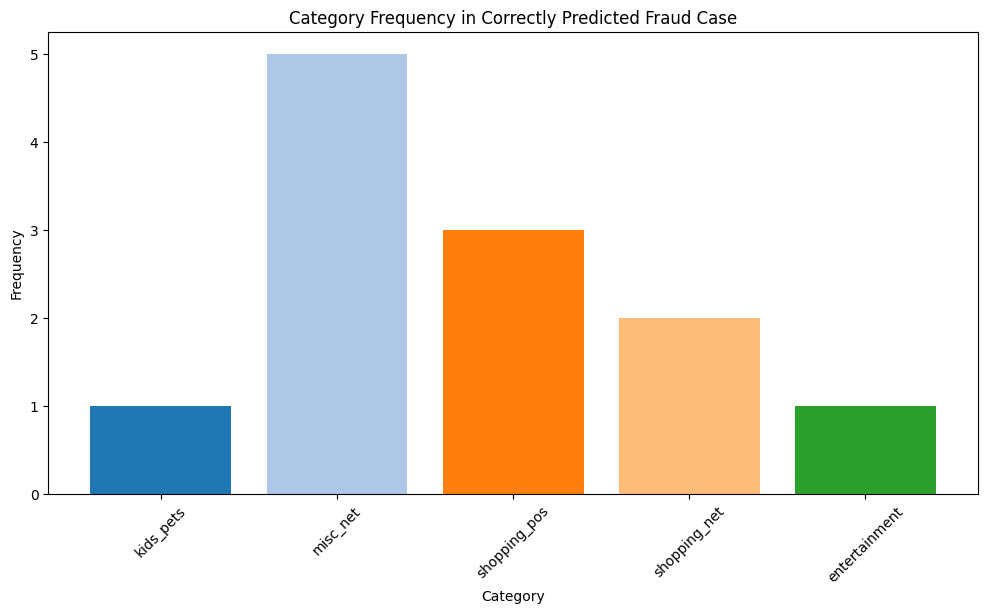

In [ ]:
category_names = correctly_predicted_fraud_cases.iloc[0]['category']

category_counts = Counter(category_names)

plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=plt.cm.tab20.colors)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Category Frequency in Correctly Predicted Fraud Case")
plt.xticks(rotation=45)
plt.yticks(range(0, int(max(category_counts.values())) + 1))
plt.show()


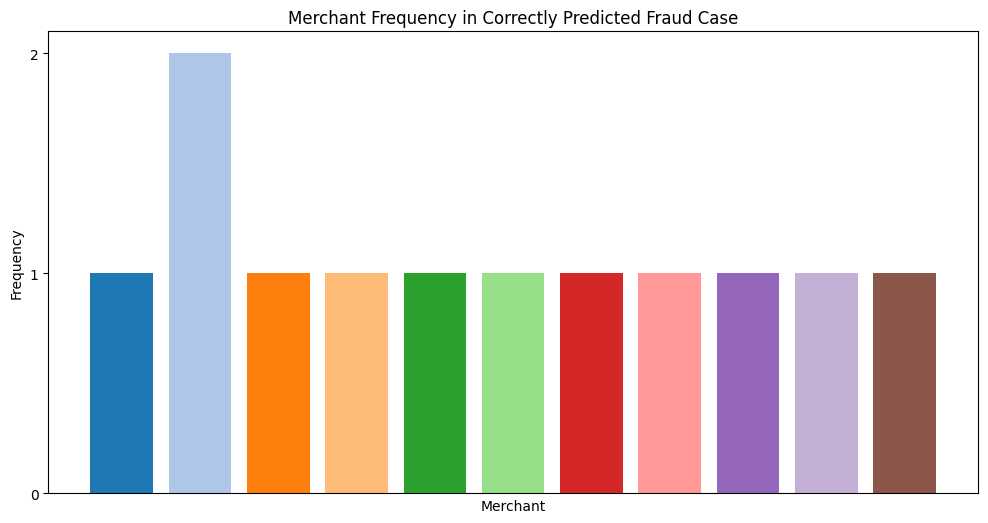

In [ ]:
merchant_names = correctly_predicted_fraud_cases.iloc[0]['merchant']

merchant_counts = Counter(merchant_names)

plt.figure(figsize=(12, 6))
plt.bar(merchant_counts.keys(), merchant_counts.values(), color=plt.cm.tab20.colors)
plt.xlabel("Merchant")
plt.ylabel("Frequency")
plt.title("Merchant Frequency in Correctly Predicted Fraud Case")
plt.xticks([])
plt.yticks(range(0, int(max(merchant_counts.values())) + 1))
plt.show()

In [ ]:
actual_fraud_indices = np.where(y_test == 1)[0]

wrongly_predicted_fraud_indices = [
    idx for idx in actual_fraud_indices if y_pred_classes[idx] == 0
]
wrongly_predicted_fraud_cases = df_grouped.iloc[X_test_indices[wrongly_predicted_fraud_indices]]

print("Wrongly Predicted Fraud Cases:")
print(wrongly_predicted_fraud_cases)

Wrongly Predicted Fraud Cases:
                  cc_num                                           merchant  \
199       30560609640617  [fraud_Bauch-Raynor, fraud_Herman, Treutel and...   
10          501882822387  [fraud_Terry-Huel, fraud_Thiel Ltd, fraud_Laba...   
78         4103158249977  [fraud_Schaefer Ltd, fraud_Lubowitz-Walter, fr...   
144       30042378430132  [fraud_Larson, Quitzon and Spencer, fraud_Boeh...   
98         4427805710168  [fraud_Bednar PLC, fraud_Wiza LLC, fraud_Rueck...   
218       38530489946071  [fraud_Metz-Boehm, fraud_Bins-Howell, fraud_Hi...   
861  4292743669224718067  [fraud_Altenwerth-Kilback, fraud_Volkman-Predo...   
197       30546453310167  [fraud_Fadel-Hilpert, fraud_Pagac LLC, fraud_J...   
825     6544734391390261  [fraud_Champlin-Casper, fraud_Reichel LLC, fra...   
419     2454076758463217  [fraud_Kilback LLC, fraud_Kozey-Kuhlman, fraud...   
602     4003989662068504  [fraud_Rempel Inc, fraud_Runte-Mohr, fraud_Rei...   
387     2235613922823

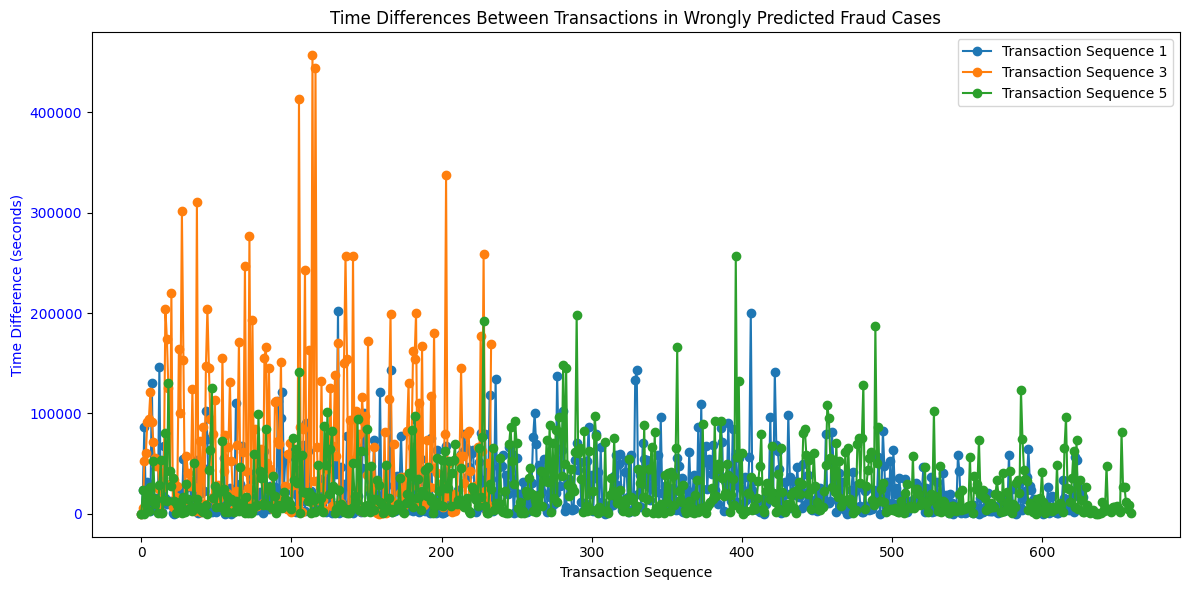

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(0,5,2):
    time_diffs = wrongly_predicted_fraud_cases.iloc[i]['time_diff']
    ax.plot(range(len(time_diffs)), time_diffs, marker='o', label=f"Transaction Sequence {i + 1}")

ax.set_xlabel("Transaction Sequence")
ax.set_ylabel("Time Difference (seconds)", color='b')
ax.tick_params(axis='y', labelcolor='b')

plt.title("Time Differences Between Transactions in Wrongly Predicted Fraud Cases")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

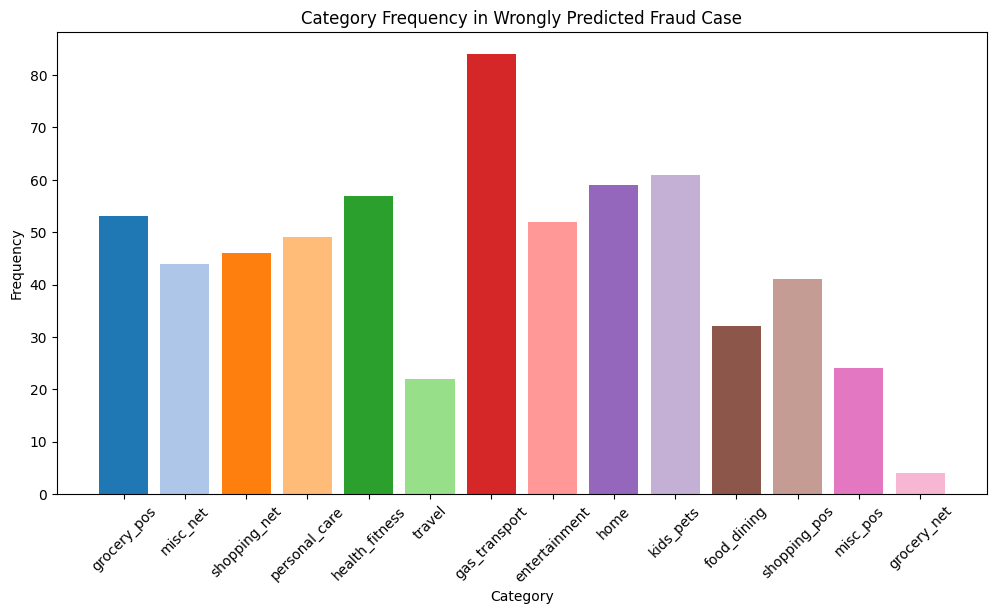

In [ ]:
category_names = wrongly_predicted_fraud_cases.iloc[0]['category']

category_counts = Counter(category_names)

plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values(), color=plt.cm.tab20.colors)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Category Frequency in Wrongly Predicted Fraud Case")
plt.xticks(rotation=45)
plt.show()